# Bias & Variance (60 points)


**This assignment aims to create the bias/variances figures similar to the figures 4.5 and 4.6 in section 4.7 of Alpaydin to help you have deeper understanding of bias and variance.**

## Question one (20 points)
**Replicate figures 4.5 in section 4.7 of Alpyadin 4th edition**

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**The ground thruth function for the regression is f(x) = 2 cos(x) + tan(0.5x)**

**Generate 100 sample datasets with f(x) + Gaussian white noise (N(0,1)). Each dataset will have 20 points randomly selected x from [-2,3] with corresponding target points.**

In [2]:
# Ground truth target function
def f(x):
    return 2 * np.cos(x) + np.tan(0.5*x)

# seed
np.random.seed(62)
# x
x = np.random.uniform(-2.0, 3.0, [100, 20])
x = np.sort(x)

# Ground truth targets
g = f(x)
# Add white noise
noisy = np.random.normal(0, 1, [100, 20])
# y
y = g + noisy

# use linspace(0,5,100) as test set to plot the images
x_test = np.linspace(-2,3,100)

###TODO: Use the First 5 datasets to generate 4 plots.</strong>
 - Figure one: Function f(x) = 2cos(x)+tan(0.5x) and one noisy dataset sampled from the function, namely "Function, and data".
 - Figure two: Generate five polynomial fits of degree ONE based on the first five datasets and name this figure with "Order 1"
 - Figure three: Generate five polynomial fits of degree THREE based on the first five datasets and name this figure with "Order 3"
 - Figure four: Generate five polynomial fits of degree FIVE based on the first five datasets and name this figure with "Order 5"
 - For figures two, three, and four, please add a dotted line as an average line for the five fits.
  
  
<b> Please use x_test to plot all the model functions, not just the ground truth function. This will make all the higher polynomial models look smoother. </b>

<br>

<strong>Hint: You can use the Sklearn’s PolynomialFeatures and LinearRegression. </storng>
- https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions

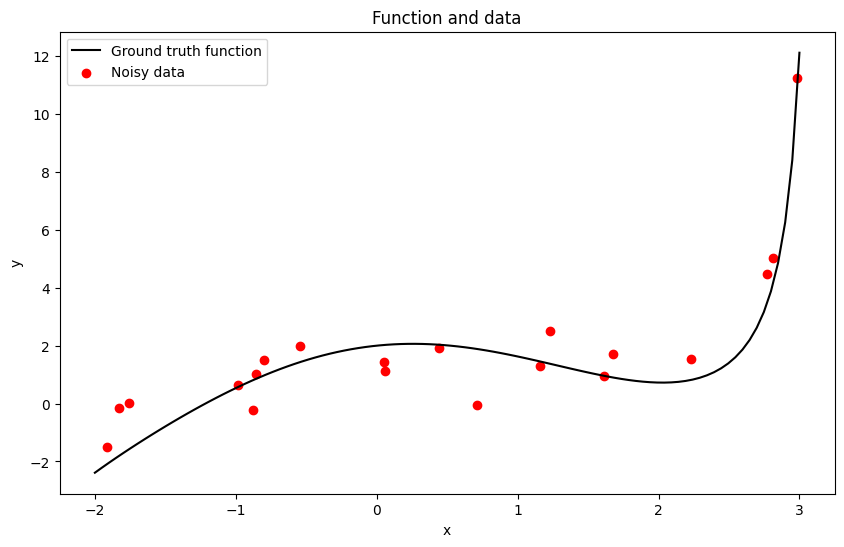

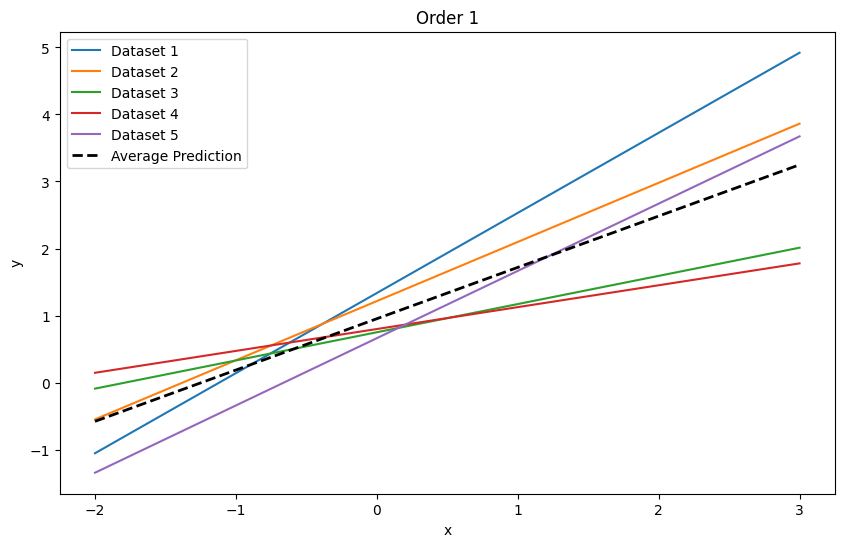

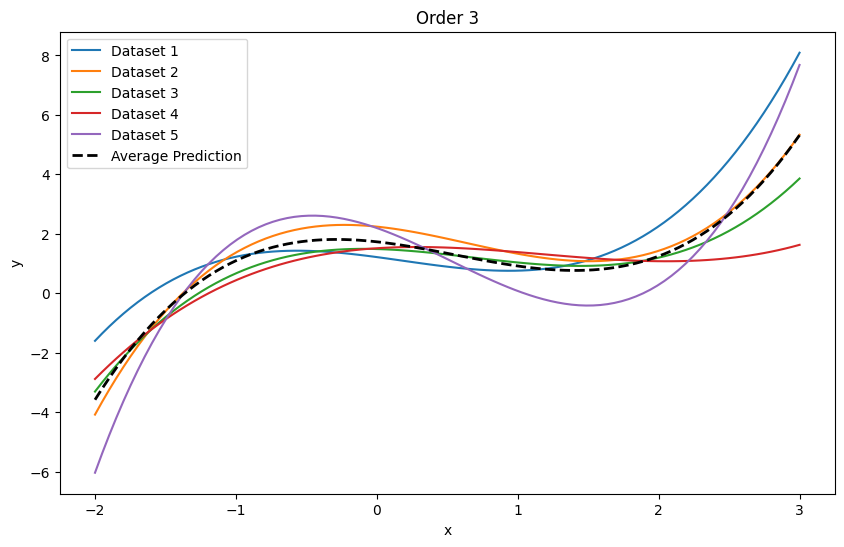

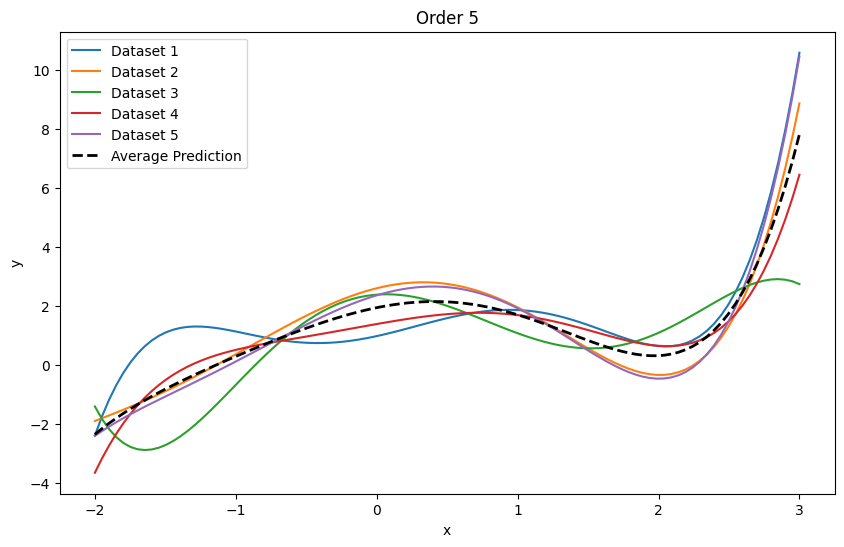

In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Test set for plotting
y_test = f(x_test)

# Plot the ground truth function and one noisy dataset
plt.figure(figsize=(10, 6))
plt.plot(x_test, y_test, label='Ground truth function', color='black')
plt.scatter(x[0, :], y[0, :], color='red', label='Noisy data')
plt.title('Function and data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Function to fit polynomial models and plot
def fit_and_plot(degrees, x, y, x_test, title):
    plt.figure(figsize=(10, 6))
    avg_predictions = np.zeros_like(x_test)
    
    for i in range(5):  # First 5 datasets
        # Transform features into polynomial features
        poly = PolynomialFeatures(degree=degrees, include_bias=False)
        x_poly = poly.fit_transform(x[i].reshape(-1, 1))
        x_test_poly = poly.transform(x_test.reshape(-1, 1))
        
        # Fit the model
        model = LinearRegression()
        model.fit(x_poly, y[i])
        
        # Predict and plot
        predictions = model.predict(x_test_poly)
        plt.plot(x_test, predictions, label=f'Dataset {i+1}')
        avg_predictions += predictions
    
    # Plot the average line
    avg_predictions /= 5
    plt.plot(x_test, avg_predictions, 'k--', label='Average Prediction', linewidth=2)
    
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Plot for polynomial degree 1
fit_and_plot(1, x, y, x_test, 'Order 1')

# Plot for polynomial degree 3
fit_and_plot(3, x, y, x_test, 'Order 3')

# Plot for polynomial degree 5
fit_and_plot(5, x, y, x_test, 'Order 5')

## Question 2 (40 points)

###TODO: Part 2a. Generate figure similar with Figure 4.6 from Alpaydin 4th Edition**

**The x-axis is the order of polynomial model, from 1 to 5. the y-axis is the error. The plot should contain three curves: total error, bias error and variance error.**

**Use all 100 dataset to compute the total error, bias error and variance error functions by using total error equation (4.36): $Ex[(E[r|x]-g(x))^2|x] = (E[r|x]) - E_X(g(x))^2 + E_X[(g(x)-E_X[g(x)])^2]$**

**Evaluate each of the three error functions with 10 equally spaced values starting from -2 and ending at 3, i.e. np.linspace(-2, 3, 10)**


**Hint: For bias error $(E[r|x]) - E_X(g(x))^2$, $E[r|x] = f(x)$ and $E_X[g(x)]$ is the average over 100 models from the 100 datasets. Then, you can approximate bias error by average over x in np.linspace(-2, 3, 10) of $(E[r|x] - E_X[g(x)])2$.**

**Hint: For variance error, you need to have a nested loops (for each dataset and for  x in np.linespace(0, 5, 10))  to get the average variance error.**

**Hint: The total error is the sum of bias error and variance error.**

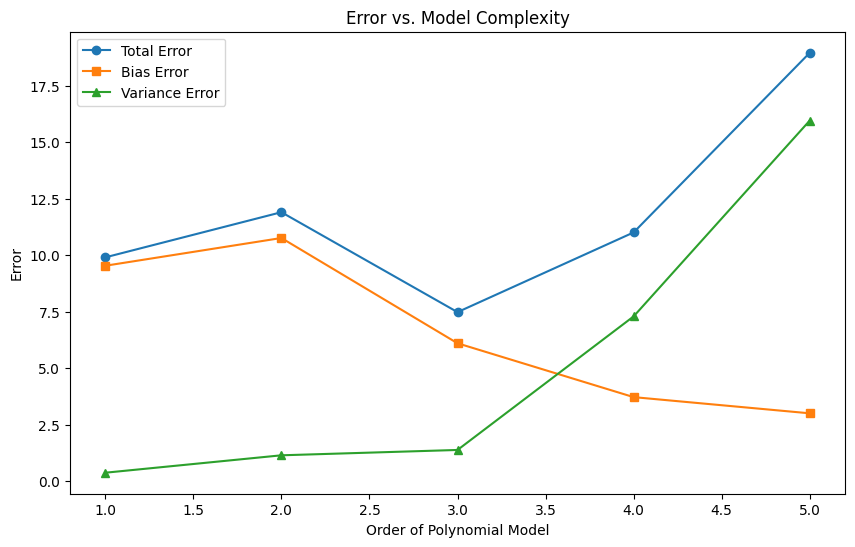

In [4]:
# Define the x values for error evaluation
x_eval = np.linspace(-2, 3, 10)

# Initialize lists to store errors for each degree
total_errors = []
bias_errors = []
variance_errors = []

# Calculate errors for polynomial models of degree 1 to 5
for degree in range(1, 6):
    # Initialize arrays to store predictions for each x_eval
    predictions = np.zeros((100, len(x_eval)))
    
    for i in range(100):  # Loop over datasets
        # Transform features into polynomial features
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        x_poly = poly.fit_transform(x[i].reshape(-1, 1))
        
        # Fit the model
        model = LinearRegression()
        model.fit(x_poly, y[i])
        
        # Predict for x_eval
        x_eval_poly = poly.transform(x_eval.reshape(-1, 1))
        predictions[i, :] = model.predict(x_eval_poly)
    
    # Calculate mean prediction for each x_eval across all datasets
    mean_predictions = predictions.mean(axis=0)
    
    # Bias error (E[r|x] - E_X[g(x)])^2
    bias_error = np.mean((f(x_eval) - mean_predictions)**2)
    
    # Variance error E_X[(g(x) - E_X[g(x)])^2]
    variance_error = np.mean(np.var(predictions, axis=0))
    
    # Total error
    total_error = bias_error + variance_error
    
    # Append errors to lists
    total_errors.append(total_error)
    bias_errors.append(bias_error)
    variance_errors.append(variance_error)

# Plot the errors
plt.figure(figsize=(10, 6))
degrees = range(1, 6)
plt.plot(degrees, total_errors, label='Total Error', marker='o')
plt.plot(degrees, bias_errors, label='Bias Error', marker='s')
plt.plot(degrees, variance_errors, label='Variance Error', marker='^')
plt.xlabel('Order of Polynomial Model')
plt.ylabel('Error')
plt.title('Error vs. Model Complexity')
plt.legend()
plt.show()

###TODO: Part 2b. Generate and print a DataFrame with 5 rows, one for each order and 4 columns. The 4 columns are:
 * **Order**
 * **Bias error**
 * **Variance error**
 * **Total error**

In [5]:
# Create a DataFrame with the errors and polynomial order
df_errors = pd.DataFrame({
    'Order': range(1, 6),
    'Bias error': bias_errors,
    'Variance error': variance_errors,
    'Total error': total_errors
})

df_errors

,Order,Bias error,Variance error,Total error
0,1,9.531254,0.370950,9.902203
1,2,10.759614,1.141956,11.901570
2,3,6.100087,1.378274,7.478360
3,4,3.716443,7.291555,11.007998
4,5,2.999806,15.960043,18.959849
